<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/hand-joints-detection/hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install mediapipe 

In [2]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
import mediapipe as mp

In [3]:
def show_im(img):
    plt.figure(figsize = (8, 8))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

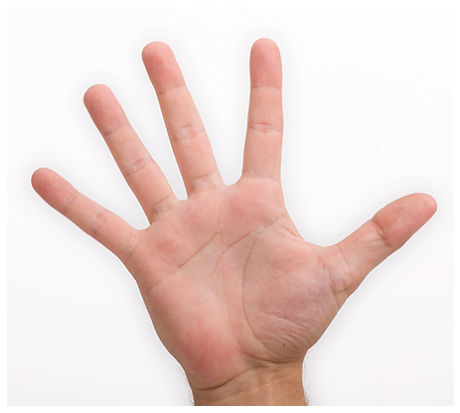

In [4]:
url = "https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/hand-joints-detection/res/hand.jpg"
req = urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
hand_im = cv2.imdecode(arr, -1)

show_im(hand_im)

In [5]:
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

In [6]:
hand_rgb = cv2.cvtColor(hand_im, cv2.COLOR_BGR2RGB) 
results = hands.process(hand_rgb)

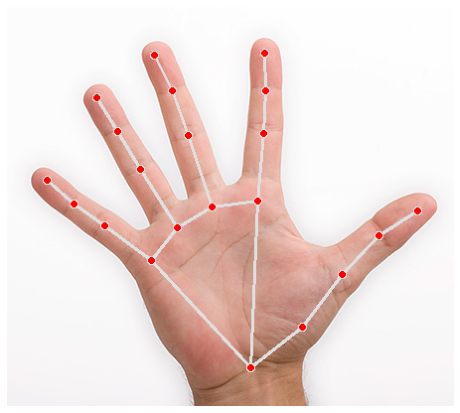

In [7]:
if results.multi_hand_landmarks:
    for hand_l_marks in results.multi_hand_landmarks:
        for id, lm in enumerate (hand_l_marks.landmark):
            h, w, c = hand_im.shape
            cx, cy = int(lm.x*w), int(lm.y*h)

            mpDraw.draw_landmarks(hand_im, hand_l_marks, mpHands.HAND_CONNECTIONS)

show_im(hand_im)